<h1 style="color:#84D5F8"> Data-driven predictive model for cooling tower performance </h1>

<u>Objective: </u> Create a data-driven predictive model based on time-series for the cooling tower efficiency. <br/>

<u>Abstract of the project:</u>
Heating Ventilation and Air Conditioning systems (HVACs) are used to control temperature and humidity inside buildings. They use cooling towers at one end to expel excess heat from the refrigerant into the atmosphere. The heat is expelled through evaporative cooling. <br/>
Cooling towers are used to expel heat from warm water coming out of water-cooled condensers in chiller units. The water has absorbed heat from the chiller’s refrigerant as it condenses. The rate of cooling depends on the cooling tower surface area, humidity, temperature, and speed of water and air. Cooling tower efficiency can be expressed as
$$
μ = (\frac{t_i  - t_o }{t_i  - t_w) })*100
$$
where
μ = cooling tower efficiency (%) <br/>
t_i  = inlet temperature of water to the tower ( o C,  o F) <br/>
t_o  = outlet temperature of water from the tower ( o C,  o F) <br/>
t_w  = wet bulb temperature average between current time and next time reading ( ^o C,  ^o F) <br/>

The temperature difference between inlet and outlet water (t_i  - t_o ) is normally in the range 10 - 15  o F. The units should be consistent for the temperature.


<h2 style='color:#84D5F8'> Load data </h2>

In [16]:
import pandas as pd
from pathlib import Path

# setup data directory
experiment_dir = Path('./data/results')
experiment_dir.mkdir(exist_ok=True)

In [17]:
df = pd.read_csv('./data/2621_Cooling_Tower_1.csv', index_col='time')
df.head()

,Cell_1bFan fanOnOff,Cell_1bFan fanStatus,Cell_1bFan vfdPercent,Cell_1bFan vfdPower,Cell_1aFan fanOnOff,Cell_1aFan fanStatus,Cell_1aFan vfdPercent,Cell_1aFan vfdPower,ESB_Tower_1 basinHeaterAlarm,ESB_Tower_1 bypassValveOpenClose,...,ESB_Tower_1 leavingWaterFlow,ESB_Tower_1 leavingWaterTemp,ESB_Tower_1 lowWaterLevelAlarm,ESB_Tower_1 makeupWaterConductivity,ESB_Tower_1 makeupWaterFlow,ESB_Tower_1 outdoorAirDryBulb,ESB_Tower_1 outdoorAirHumidity,ESB_Tower_1 outdoorAirWetBulb,ESB_Tower_1 waterConductivity,ESB_Tower_1 waterLevel
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 06:00:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,76.821442,51.510937,NaN,NaN
2019-01-01 06:05:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,77.292564,51.535805,NaN,NaN
2019-01-01 06:10:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,75.833458,51.318092,NaN,NaN
2019-01-01 06:15:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,75.666313,51.256962,NaN,NaN
2019-01-01 06:20:00+00:00,False,False,99.589935,NaN,False,False,99.589935,NaN,NaN,True,...,NaN,67.951897,NaN,NaN,NaN,55.596096,77.656372,51.601902,NaN,NaN


<h2 style='color:#84D5F8'> Missing data imputation </h2>

In [18]:
# look at amount of missing data in each column
df.apply(pd.isnull).sum()/df.shape[0]

Cell_1bFan fanOnOff                            0.0
Cell_1bFan fanStatus                           0.0
Cell_1bFan vfdPercent                          0.0
Cell_1bFan vfdPower                            1.0
Cell_1aFan fanOnOff                            0.0
Cell_1aFan fanStatus                           0.0
Cell_1aFan vfdPercent                          0.0
Cell_1aFan vfdPower                            1.0
ESB_Tower_1 basinHeaterAlarm                   1.0
ESB_Tower_1 bypassValveOpenClose               0.0
ESB_Tower_1 coolingTowerEnable                 0.0
ESB_Tower_1 coolingTowerEnableTempSetPoint     1.0
ESB_Tower_1 coolingTowerLockoutTempSetPoint    1.0
ESB_Tower_1 enteringWaterFlow                  1.0
ESB_Tower_1 enteringWaterTemp                  0.0
ESB_Tower_1 highWaterLevelAlarm                1.0
ESB_Tower_1 leavingWaterFlow                   1.0
ESB_Tower_1 leavingWaterTemp                   0.0
ESB_Tower_1 lowWaterLevelAlarm                 1.0
ESB_Tower_1 makeupWaterConducti

Columns are either completely full or completely empty. So we can drop all empty columns.

In [19]:
df.dropna(axis=1, how="all", inplace=True)

In [20]:
# fix data types
df.index = pd.to_datetime(df.index, utc='True')
df.dtypes

Cell_1bFan fanOnOff                    bool
Cell_1bFan fanStatus                   bool
Cell_1bFan vfdPercent               float64
Cell_1aFan fanOnOff                    bool
Cell_1aFan fanStatus                   bool
Cell_1aFan vfdPercent               float64
ESB_Tower_1 bypassValveOpenClose       bool
ESB_Tower_1 coolingTowerEnable         bool
ESB_Tower_1 enteringWaterTemp       float64
ESB_Tower_1 leavingWaterTemp        float64
ESB_Tower_1 outdoorAirDryBulb       float64
ESB_Tower_1 outdoorAirHumidity      float64
ESB_Tower_1 outdoorAirWetBulb       float64
dtype: object

All data types are correct already.

In [21]:
df['month'] = df.index.strftime('%Y-%m')
df

,Cell_1bFan fanOnOff,Cell_1bFan fanStatus,Cell_1bFan vfdPercent,Cell_1aFan fanOnOff,Cell_1aFan fanStatus,Cell_1aFan vfdPercent,ESB_Tower_1 bypassValveOpenClose,ESB_Tower_1 coolingTowerEnable,ESB_Tower_1 enteringWaterTemp,ESB_Tower_1 leavingWaterTemp,ESB_Tower_1 outdoorAirDryBulb,ESB_Tower_1 outdoorAirHumidity,ESB_Tower_1 outdoorAirWetBulb,month
time,,,,,,,,,,,,,,
2019-01-01 06:00:00+00:00,False,False,99.589935,False,False,99.589935,True,True,66.579277,67.951897,55.596096,76.821442,51.510937,2019-01
2019-01-01 06:05:00+00:00,False,False,99.589935,False,False,99.589935,True,True,65.755974,67.951897,55.596096,77.292564,51.535805,2019-01
2019-01-01 06:10:00+00:00,False,False,99.589935,False,False,99.589935,True,True,65.364723,67.951897,55.596096,75.833458,51.318092,2019-01
2019-01-01 06:15:00+00:00,False,False,99.589935,False,False,99.589935,True,True,67.249046,67.951897,55.596096,75.666313,51.256962,2019-01
2019-01-01 06:20:00+00:00,False,False,99.589935,False,False,99.589935,True,True,63.985386,67.951897,55.596096,77.656372,51.601902,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 05:35:00+00:00,True,True,0.000000,True,True,0.000000,True,True,65.024918,67.990540,42.361458,46.367363,34.826103,2020-01
2020-01-01 05:40:00+00:00,False,False,0.000000,False,False,0.000000,True,True,64.411736,67.990540,42.361458,46.831158,34.796047,2020-01
2020-01-01 05:45:00+00:00,True,True,0.934546,True,True,0.934546,True,True,65.337555,67.990540,42.063175,47.062832,34.699188,2020-01


<h2 style='color:#84D5F8'> Exploratory data analysis </h2></br>
Visualization and outlier removal

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from statistics import mean


In [23]:
df.describe()

,Cell_1bFan vfdPercent,Cell_1aFan vfdPercent,ESB_Tower_1 enteringWaterTemp,ESB_Tower_1 leavingWaterTemp,ESB_Tower_1 outdoorAirDryBulb,ESB_Tower_1 outdoorAirHumidity,ESB_Tower_1 outdoorAirWetBulb
count,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000,103915.000000
mean,35.697364,35.697717,72.212080,69.485519,63.384678,62.180180,55.167784
std,46.703482,46.703268,7.214412,5.226963,17.696170,19.742004,14.895606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,67.733768,66.164246,48.980747,46.242802,43.115774
50%,0.000000,0.000000,70.858467,68.119827,64.833214,62.475151,57.063919
75%,100.000000,100.000000,77.584534,73.793045,77.360619,78.438663,69.104118
max,100.000000,100.000000,91.269211,89.454002,100.139587,98.166000,81.819206


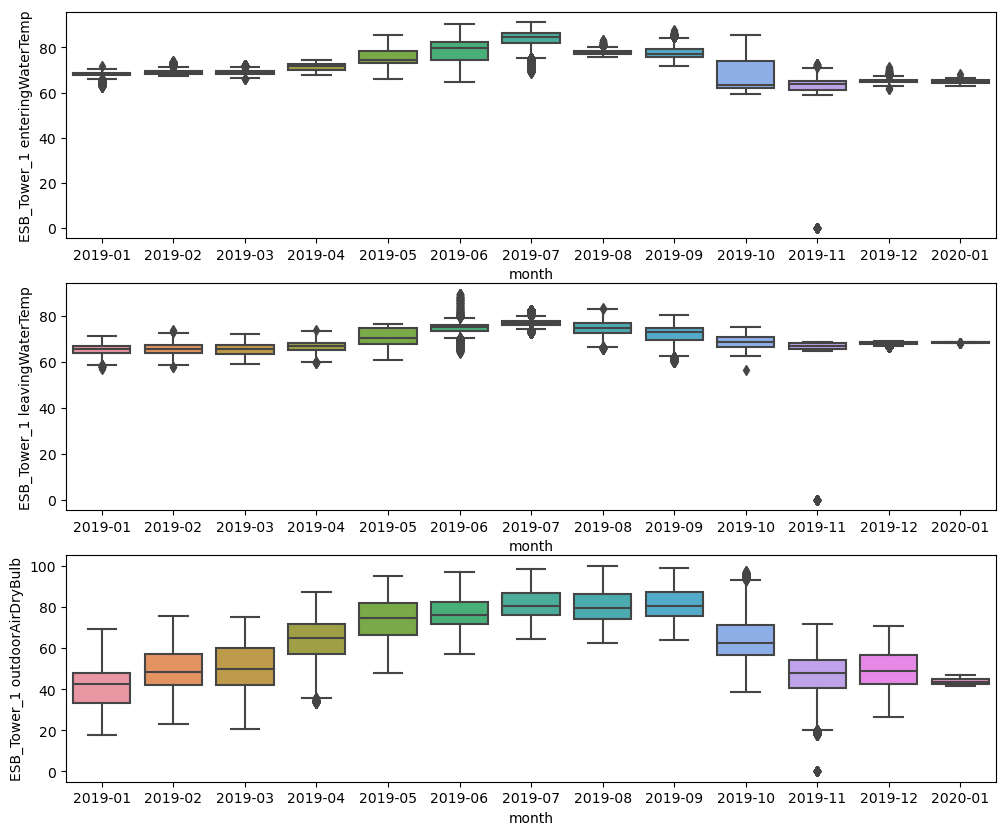

In [24]:
fig, ax = plt.subplots(3)
fig.set_size_inches((12,10))
sns.boxplot(x='month',y='ESB_Tower_1 enteringWaterTemp', data=df,ax=ax[0])
sns.boxplot(x='month',y='ESB_Tower_1 leavingWaterTemp', data=df,ax=ax[1])
sns.boxplot(x='month',y='ESB_Tower_1 outdoorAirDryBulb', data=df,ax=ax[2])

plt.show()

The apparent outliers demonstrated by the boxplots are actually reasonable values and not outliers since they lie withing the general range of temperatures in Nashville during the relevant months.

The only outliers that must be dealt with lie around 0F in 2019-11.

In [25]:
df = df.drop(df[df['ESB_Tower_1 enteringWaterTemp'] == 0].index)

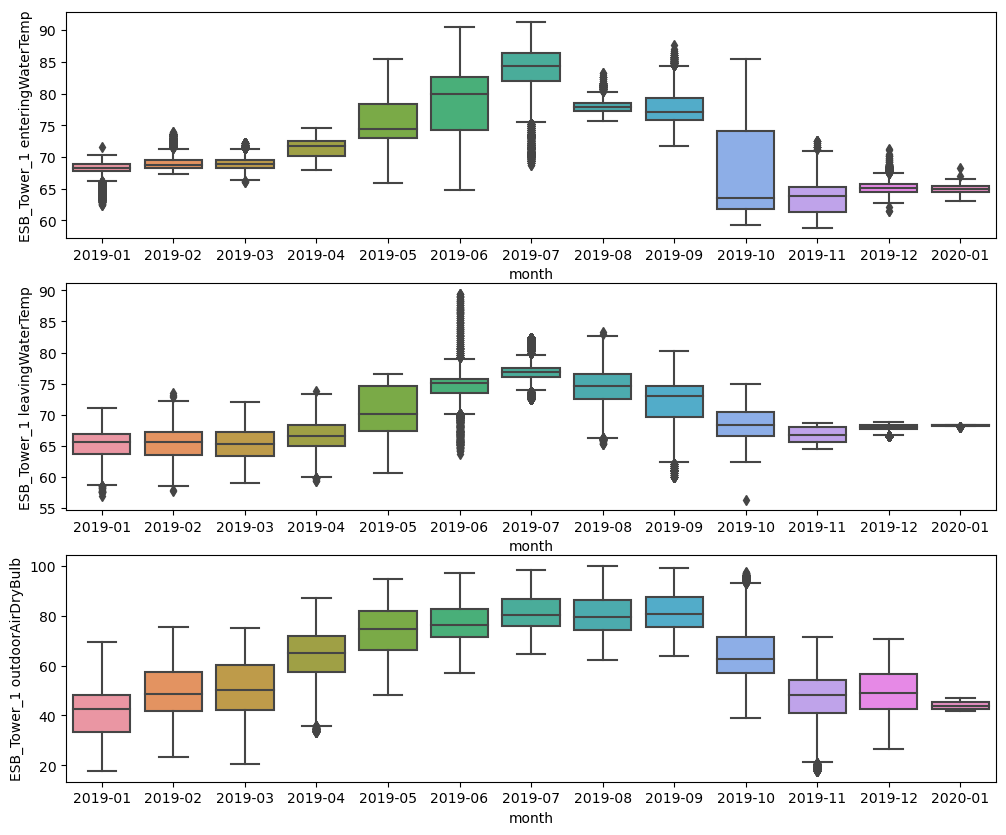

In [26]:
fig, ax = plt.subplots(3)
fig.set_size_inches((12,10))
sns.boxplot(x='month',y='ESB_Tower_1 enteringWaterTemp', data=df,ax=ax[0])
sns.boxplot(x='month',y='ESB_Tower_1 leavingWaterTemp', data=df,ax=ax[1])
sns.boxplot(x='month',y='ESB_Tower_1 outdoorAirDryBulb', data=df,ax=ax[2])

plt.show()

<h2 style='color:#84D5F8'> Efficiency </h2>
Compute the cooling tower efficiency as a performance metric for the system and analyze the behavior (smoothness, noise, continuity, multimodality, and monotonicity) <br>

Calculating efficiency as (temperature in at current time – temperature out at next time) * 100 / (temperature in at current time – wet bulb temperature average between two times)

In [27]:
# turn off setting with copy warning for now
pd.set_option('mode.chained_assignment', None)

In [28]:
# temperature of water leaving at next time
df['ESB_Tower_1 nextLeavingWaterTemp'] = df['ESB_Tower_1 leavingWaterTemp'].shift(periods=-1)

# wet bulb temperature average between current and next time
df['ESB_Tower_1 nextWetBulbAverage'] = df['ESB_Tower_1 outdoorAirWetBulb'].rolling(2).mean().shift(-1)

# last row has a nan value for wet bulb average
df.drop(df.index[-1], inplace=True)

# create efficiency column
df['efficiency'] = abs((df['ESB_Tower_1 enteringWaterTemp'] - df['ESB_Tower_1 nextLeavingWaterTemp']) * 100
                       /(df['ESB_Tower_1 enteringWaterTemp'] -  df['ESB_Tower_1 nextWetBulbAverage']) )

Remove outliers from efficiency.

In [29]:
# remove outliers: any value 1.5*IQR above the third qaurtile or 1.5*IQR below the first quartile
def remove_outliers(column_name, df=df, multiplier=1.5):
    Q1=df[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)
    IQR=Q3-Q1

    lower_lim = Q1- multiplier * IQR
    upper_lim = Q3 + multiplier * IQR
    print('25th percentile: ', lower_lim)
    print('75th percentile: ', upper_lim)
    
    df = df[(df[column_name] >= lower_lim) & (df[column_name] <= upper_lim)]
    return df

In [30]:
df = remove_outliers('efficiency')

25th percentile:  -51.35199278726523
75th percentile:  120.32350644606669


<h4 style='color:#84D5F8'> Smoothness </h4>

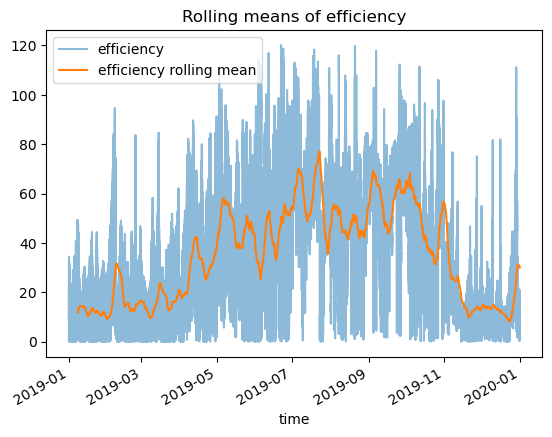

In [31]:
# Calculate the rolling average for each column
window_size = 12*24*7 # window size is number of observations in a week
df['efficiency_rolling_mean'] = df['efficiency'].rolling(window_size).mean()

# Plot the rolling average as a line plot
df['efficiency'].plot(kind='line', alpha=0.5, label='efficiency')
df['efficiency_rolling_mean'].plot(kind='line', label='efficiency rolling mean')
plt.title('Rolling means of efficiency')
plt.legend()
plt.show()

<h4 style='color:#84D5F8'> Dealing with efficiency >100%</h4>

As seen in the smoothness plot, there are values of efficiency >100. 

To check if this is simpy due to noise, I will:
- Visualize distribution of efficiency values and identify the percentage of values that are >100
- Compare the behaviour of efficiency values >100% with efficiency values in the range 95%-100%

<p style="color:#84D5F8"> 1. Distribution of efficiency values (Modality) </p>

Percentage of efficiency values >100:  0.5596362364463099 %


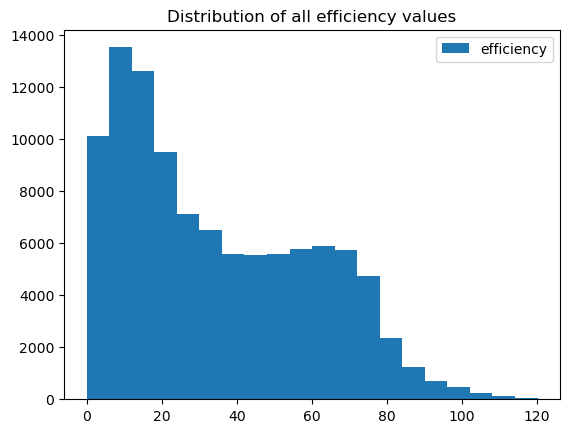

In [32]:
plt.hist(df['efficiency'], bins=20, label='efficiency')
plt.legend()
plt.title('Distribution of all efficiency values')

percentOver100 = len(df[df["efficiency"] > 100]) / len(df[df["efficiency"] <= 100]) * 100
print('Percentage of efficiency values >100: ', percentOver100, '%')

plt.show()

Efficiency distribution is <b>unimodal</b>. </br>

<p style="color:#84D5F8"> 2. Compare the behaviour of data when efficiency >100% with the cases when efficiency is in the range 95%-100% </p>

In [33]:
df_efficOver100 = df[df["efficiency"] > 100]
df_effic95_to_100 = df[(df["efficiency"] <= 100) & (df["efficiency"] >= 95)]

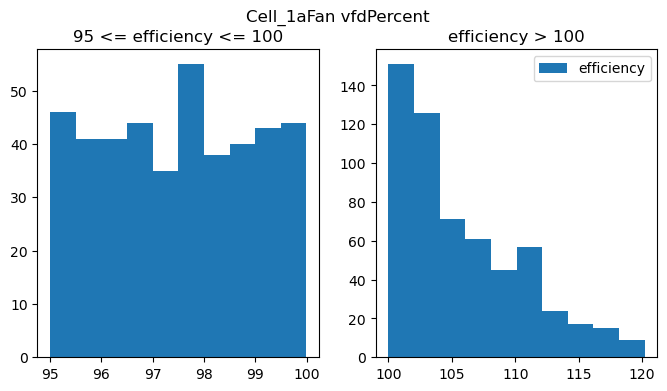

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((8,4))

ax1.hist(df_effic95_to_100['efficiency'], bins=10, label='efficiency')
ax2.hist(df_efficOver100['efficiency'], bins=10, label='efficiency')

fig.suptitle('Cell_1aFan vfdPercent')

ax1.set_title('95 <= efficiency <= 100')
ax2.set_title('efficiency > 100')

plt.legend()
plt.show()

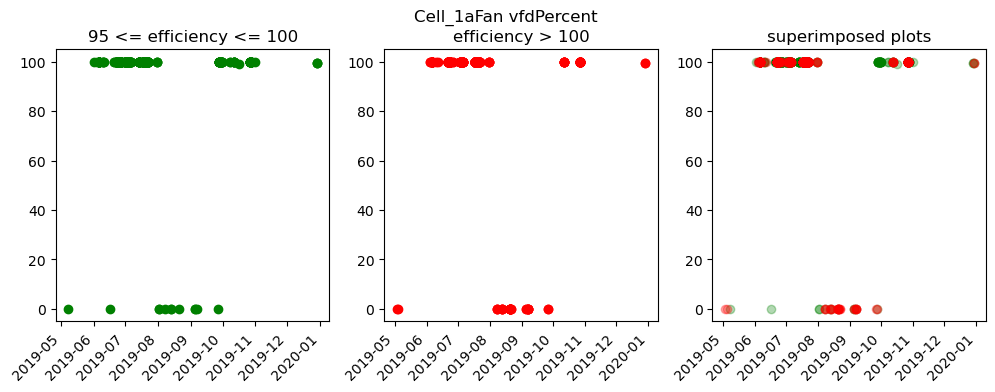

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches((12,4))

ax1.scatter(df_effic95_to_100.index, df_effic95_to_100['Cell_1aFan vfdPercent'], c='green')
ax2.scatter(df_efficOver100.index, df_efficOver100['Cell_1aFan vfdPercent'], c='red')
ax3.scatter(df_effic95_to_100.index, df_effic95_to_100['Cell_1aFan vfdPercent'], c='green', alpha=0.3)
ax3.scatter(df_efficOver100.index, df_efficOver100['Cell_1aFan vfdPercent'], c='red', alpha=0.3)

ax1.set_title('95 <= efficiency <= 100')
ax2.set_title('efficiency > 100')
ax3.set_title('superimposed plots')

fig.suptitle('Cell_1aFan vfdPercent')
fig.autofmt_xdate(rotation=45)

plt.show()

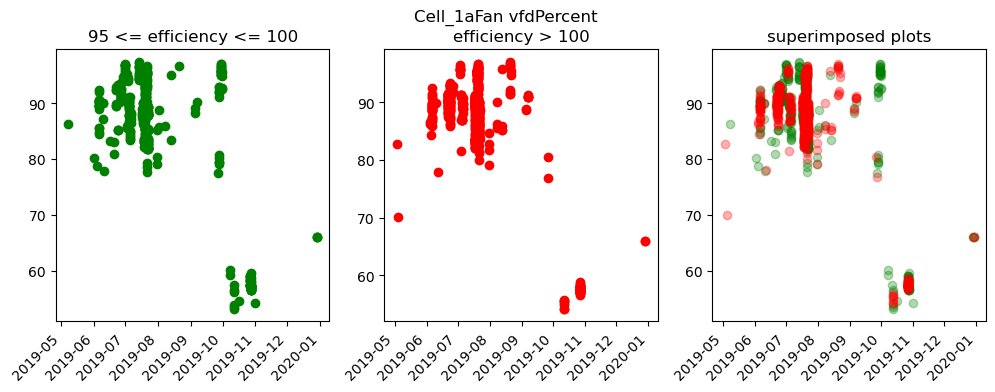

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches((12,4))

ax1.scatter(df_effic95_to_100.index, df_effic95_to_100['ESB_Tower_1 outdoorAirDryBulb'], c='green')
ax2.scatter(df_efficOver100.index, df_efficOver100['ESB_Tower_1 outdoorAirDryBulb'], c='red')
ax3.scatter(df_effic95_to_100.index, df_effic95_to_100['ESB_Tower_1 outdoorAirDryBulb'], c='green', alpha=0.3)
ax3.scatter(df_efficOver100.index, df_efficOver100['ESB_Tower_1 outdoorAirDryBulb'], c='red', alpha=0.3)

ax1.set_title('95 <= efficiency <= 100')
ax2.set_title('efficiency > 100')
ax3.set_title('superimposed plots')

fig.suptitle('Cell_1aFan vfdPercent')
fig.autofmt_xdate(rotation=45)

plt.show()

- Since only 0.56% of all values of efficiency are >100%, it constitutes a very small portion of the data. 
- The distribution of efficiency values in the range 100-120 is skewed to the left. 
- The data mostly appeards to have similar behaviour when efficiency>100 and when it's in the range 95-100.

These factors indicate that the presence of efficiency values >100% is just due to noise.

<h4 style="color:#84D5F8"> Continuity </h4>

<AxesSubplot:xlabel='time'>

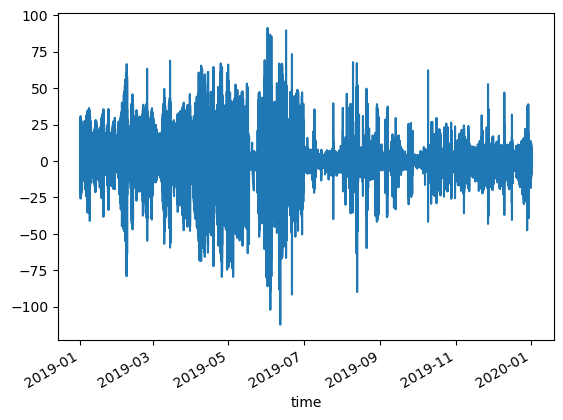

In [37]:
# Plot the difference between each consecutive value in each column as a line plot
df['efficiency'].diff().plot(kind='line')

<h2 style="color:#84D5F8"> Predictive Models </h2>

Create a data-driven predictive model for the temperature of the water exiting the cooling tower and going to the condenser.

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Number of features = 18
Number of rows = 40550


<AxesSubplot:xlabel='time'>

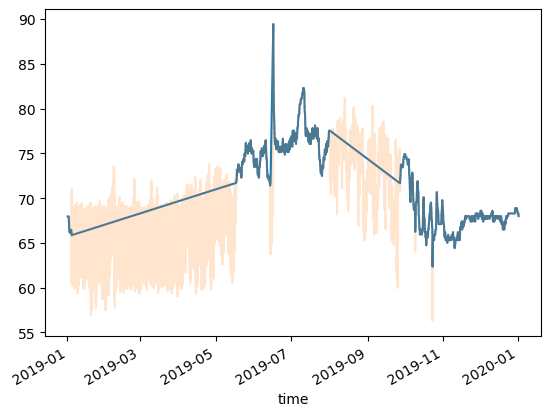

In [39]:
df_on = df[df['Cell_1aFan fanOnOff'] | df['Cell_1bFan fanOnOff']]

print('Number of features = %d' % df_on.shape[1])
print('Number of rows = %d' % df_on.shape[0])

df_on['ESB_Tower_1 leavingWaterTemp'].plot()
df['ESB_Tower_1 leavingWaterTemp'].plot(alpha=0.2)

In [40]:
# Add target
target_name = 'ESB_Tower_1 leavingWaterTemp'
df_on['target'] = df.shift(-2)[target_name]

# Add more predictors
df_on['leavingWaterTemp_ratio'] = df_on['ESB_Tower_1 leavingWaterTemp'].pct_change(3)

# Clean up NaN values created after adding predictors/targets
df_on.dropna(axis=0, how="any", inplace=True)

In [41]:
df_on.corrwith(df_on['target'])

Cell_1bFan fanOnOff                 0.011893
Cell_1bFan fanStatus                0.047746
Cell_1bFan vfdPercent               0.522351
Cell_1aFan fanOnOff                 0.018591
Cell_1aFan fanStatus                0.091191
Cell_1aFan vfdPercent               0.522359
ESB_Tower_1 bypassValveOpenClose         NaN
ESB_Tower_1 coolingTowerEnable           NaN
ESB_Tower_1 enteringWaterTemp       0.922230
ESB_Tower_1 leavingWaterTemp        0.999816
ESB_Tower_1 outdoorAirDryBulb       0.785661
ESB_Tower_1 outdoorAirHumidity      0.067796
ESB_Tower_1 outdoorAirWetBulb       0.855028
ESB_Tower_1 nextLeavingWaterTemp    0.999870
ESB_Tower_1 nextWetBulbAverage      0.854983
efficiency                          0.472116
efficiency_rolling_mean             0.662904
target                              1.000000
leavingWaterTemp_ratio              0.021806
dtype: float64

In [42]:
# Select features
feature_names = ['ESB_Tower_1 enteringWaterTemp', 'ESB_Tower_1 outdoorAirHumidity', 'ESB_Tower_1 outdoorAirDryBulb', 'ESB_Tower_1 outdoorAirWetBulb', 'Cell_1aFan vfdPercent', 'leavingWaterTemp_ratio', 'efficiency_rolling_mean']
features_df = df_on[feature_names]

In [43]:
# save features and targets to experiment directory
features_df.to_csv(experiment_dir / 'prepared_features.csv')
df_on['target'].to_csv(experiment_dir / 'prepared_targets.csv')

In [44]:
def create_predictions(features, pdframe, model):
    
    # split train and test data - use old data as training data and recent data as test set.
    X = pdframe[features]
    X_scaled = scaler.fit_transform(X)
    y = pdframe['target']

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # train model and get predictions
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # find error in predictions
    mabs_error = mean_absolute_error(y_test, predictions)
    msq_error = mean_squared_error(y_test, predictions)

    cv_scores = cross_val_score(model, X, y, cv = 15)

    # combine predictions with actual values
    # predictions is a numpy array, convert it to pd series and concatenate to a dataframe
    combined = pd.concat([y_test, pd.Series(predictions, index=y_test.index)], axis=1)
    combined.columns = ['actual', 'predictions']

    return mabs_error, msq_error, cv_scores, combined

<h4 style="color:#84D5F8"> Model 1: Random Forest Regressor </h4>

I was originally working with a Decision Tree Regressor model, but then switched to a Random Forest Regressor to avoid overfitting.

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [46]:
mabs_error, msq_error, cv_scores, combined = create_predictions(feature_names, df_on, model)

0.09215140965817505
0.07169025325913317
[ -0.53550734  -6.37158713   0.03139206 -20.88789571  -0.72240171
  -1.22219312   0.2953312   -0.6230745   -0.19759221  -0.91200884
  -2.06242446   0.5035913   -0.93906306  -0.5146804   -7.42815275]


<AxesSubplot:xlabel='time'>

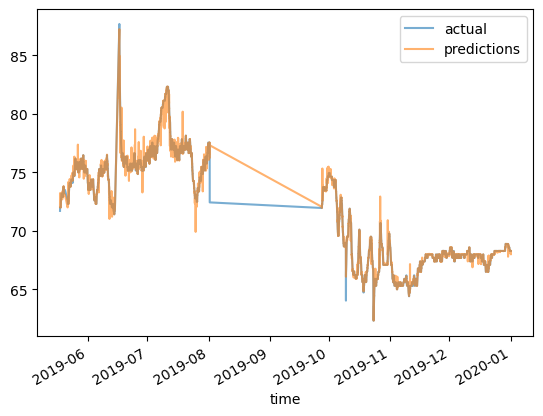

In [47]:
# print results
print(mabs_error)
print(msq_error)
print(cv_scores)
combined.plot(alpha=0.6)

<h4 style="color:#84D5F8"> Model 2: Neural Network </h4>

In [ ]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(150), max_iter = 300,activation = 'relu', solver = 'adam')

In [ ]:
mabs_error, msq_error, cv_scores, combined = create_predictions(feature_names, df_on, nn)

In [ ]:
# print results
print(mabs_error)
print(msq_error)
print(cv_scores)
combined.plot(alpha=0.6)